In [7]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [8]:
train_data = pd.read_csv('train_data.txt', delimiter=' ::: ', engine='python', header=None, names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])


In [9]:
test_data = pd.read_csv('test_data.txt', delimiter=' ::: ', engine='python', header=None, names=['ID', 'TITLE', 'DESCRIPTION'])


In [10]:
data = pd.concat([train_data, test_data], axis=0)

In [12]:
import nltk

# Download the stopwords resource
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
import nltk

# Download the punkt resource
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [15]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download the stopwords resource
nltk.download('stopwords')

# ...

# Tokenization and stop words removal
stop_words = set(stopwords.words('english'))
data['DESCRIPTION'] = data['DESCRIPTION'].apply(lambda x: ' '.join([word.lower() for word in word_tokenize(x) if word.isalnum() and word.lower() not in stop_words]))

# ...


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
stop_words = set(stopwords.words('english'))
data['DESCRIPTION'] = data['DESCRIPTION'].apply(lambda x: ' '.join([word.lower() for word in word_tokenize(x) if word.isalnum() and word.lower() not in stop_words]))

In [17]:
train_data = data.iloc[:len(train_data)]
test_data = data.iloc[len(train_data):]


In [18]:
vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed
X = vectorizer.fit_transform(train_data['DESCRIPTION'])
y = train_data['GENRE']

In [20]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)


MultinomialNB()

In [22]:
y_pred = nb_classifier.predict(X_valid)


In [23]:
print("Accuracy:", accuracy_score(y_valid, y_pred))
print("\nClassification Report:\n", classification_report(y_valid, y_pred))

Accuracy: 0.5204279258507793

Classification Report:
               precision    recall  f1-score   support

      action       0.58      0.08      0.14       263
       adult       1.00      0.04      0.09       112
   adventure       0.36      0.04      0.07       139
   animation       0.00      0.00      0.00       104
   biography       0.00      0.00      0.00        61
      comedy       0.50      0.42      0.46      1443
       crime       0.00      0.00      0.00       107
 documentary       0.58      0.88      0.70      2659
       drama       0.45      0.83      0.59      2697
      family       1.00      0.01      0.01       150
     fantasy       0.00      0.00      0.00        74
   game-show       1.00      0.15      0.26        40
     history       0.00      0.00      0.00        45
      horror       0.74      0.35      0.48       431
       music       0.77      0.12      0.20       144
     musical       0.00      0.00      0.00        50
     mystery       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
X_test = vectorizer.transform(test_data['DESCRIPTION'])
test_predictions = nb_classifier.predict(X_test)

In [25]:
test_data['PREDICTED_GENRE'] = test_predictions
test_data.to_csv('test_predictions.csv', index=False)

<ipython-input-25-21a23800004e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['PREDICTED_GENRE'] = test_predictions


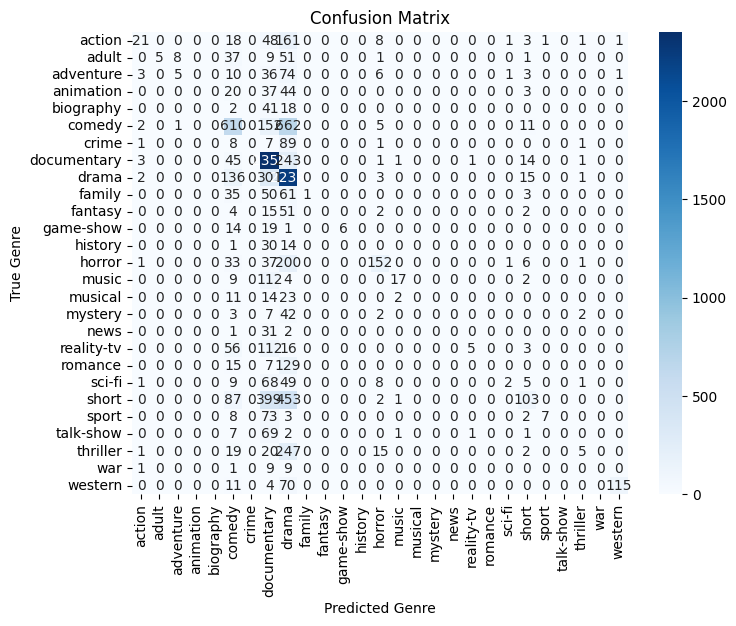

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create confusion matrix
conf_matrix = confusion_matrix(y_valid, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=nb_classifier.classes_, yticklabels=nb_classifier.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Genre')
plt.ylabel('True Genre')
plt.show()
